In [1]:
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action= 'ignore')

# Classification

## MNIST

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, y = mnist["data"], mnist["target"]

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Visualize the image

'5'

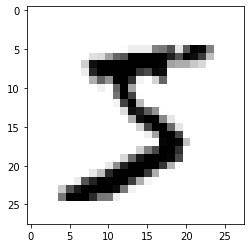

In [ ]:
some_digit = np.array(X.iloc[0, :])
some_image = some_digit.reshape(28,28)

plt.imshow(some_image, cmap = 'binary')
y[0]

Split and prep data

In [ ]:
 split = 60000
 X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
y_train, y_test = y_train.astype(np.uint8), y_test.astype(np.uint8)

## Create a binary classifier

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
#testing on a "2"
sgd_clf.predict(np.array(X.iloc[5, :]).reshape(1,-1))

array([False])

### Cross validation accuracy measurements

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv = 5, scoring = 'accuracy')

array([0.95466667, 0.96975   , 0.9635    , 0.96533333, 0.94841667])

### Confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
#just likec ross val score but instead of accuracy, it gives us "clean" predictions for each instance of the training

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

# row 1 is actual non 5s
#row 2 is actual 5s
# col 1 is predicted non 5s
# col 2 is predicted 5s

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
cm = confusion_matrix(y_train_5, y_train_pred)

tn = cm[0,0]
tp = cm[1,1]

fn = cm[0,1]
fp = cm[1,0]

precision = tp / (tp+fp)
recall = tp/ (tp + fn)

print(precision, recall)

print("This means that despite high accuracy, the model only correctly claims an image is 5 {}% of the time, and it only detects {}% of the actual 5s".format(np.round(precision * 100, 2), np.round(recall*100, 2)))

0.6511713705958311 0.8370879772350012
This means that despite high accuracy, the model only correctly claims an image is 5 65.12% of the time, and it only detects 83.71% of the actual 5s


### F1 score

*   Prefers those where precision and recall are fairly similar



In [ ]:
f1 = 2 / (1/precision + 1/recall)
print('F1 score is', f1)

F1 score is 0.7325171197343847


SGD classifier assigns a score to the value with a default threshold, which we can't manipulate directly, but we can call it.

In [ ]:
y_scores = sgd_clf.decision_function(X_train)
thresholds = [0, 100, 1000, 5000]

for threshold in thresholds:
  y_some_digit_pred = (y_scores > threshold)
  print('With a threshold of', threshold, 'the proportion of 5s predicted is',sum(y_some_digit_pred) / len(y_some_digit_pred))

#As we increase the threshold, the recall decreases
#For precision we have less true positive, but also less false positive probably

With a threshold of 0 the proportion of 5s predicted is 0.11805
With a threshold of 100 the proportion of 5s predicted is 0.11465
With a threshold of 1000 the proportion of 5s predicted is 0.09181666666666667
With a threshold of 5000 the proportion of 5s predicted is 0.0346


### Deciding on a threshold

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
  plt.xlim(left = -55_000)
  plt.legend()

  plt.xlabel('Threshold')
  plt.ylabel('Score')

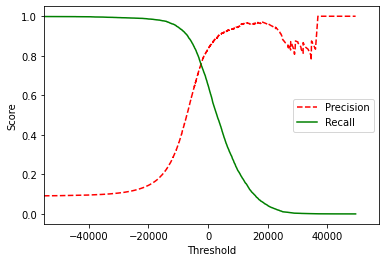

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

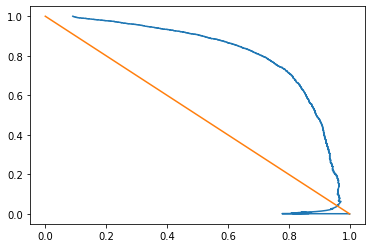

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(precisions, recalls)
  plt.plot([0,1], [1,0])
  
plot_precision_vs_recall(precisions, recalls)
plt.show()

### ROC Curve

*   When positive classes are rare or we care more about false positives than false negatives, plot precision vs recall
*   



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) #returns 3 values

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth = 2, label=label)
  plt.plot([0,1], [0,1], 'k--')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Random Forest comparision

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

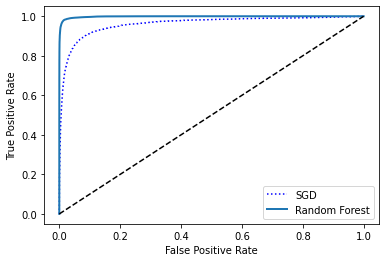

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc="lower right")
plt.show()

#We wna stay far away from the diagonal line, so random forest looks better and optimize AUC


In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## Multiclass Classifiers

*   Some classes like SGD classifiers, Random Forest classifiers, and naive Bayes classifiers can handle these natively
*   SVMs or Logistic Regression are binary only, but we can use ensembles



In [ ]:
# To train a classifier on digit images into 10 classes, we could train 10 binary classifiers

#get score from each classifier and select the class whose classifier outputs the highest score
  #One versus Rest strategy or one-versus-all

### Ensemble models (ovr ovo)

Or we can do a one-versus-one strategy,  where we train a binary classifier for each pair of digits

This equals N * (N-1) / 2 classifiers

These are generally easier to train because you just train on a portion of the data

In [ ]:
#SKLearn automaticalls runs ovr  or ovo depending on algorithm!
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])


array([5], dtype=uint8)

Under thoe hood, we are using the OvO strategy, which means 45 binary classifiers

Get decision scores for the image and select the class that won the most "duels"

We can return with the decision_function, 10 scores per instance for each class

In [ ]:
#So for this one,
  # _ vs 1, and _ vs 2... vs 10 for all pairs of classifiers

# highest score corresponds to the class choice

In [ ]:
#To force sklearn to use OvO or OvR

from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

#So we make a wrapper around the model that forces it to use one or the other

KeyboardInterrupt: ignored

In [ ]:
#This trains 10 estimators, on more data

## SGD ##
#Using SGD, it only needs to train one model 

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

### SGD model with cross_val_scores

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
#By scaling we can improve our accuracy alot

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

## Error Analysis

In [ ]:
#next we should explore data prep options and make multiple options, shortlisting best ones and doing hyperparameter tunings

In [ ]:
#Finding ways to improve a specific good potential model, by running error analysis

#cross_val_predict and confusion_matrix like before
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

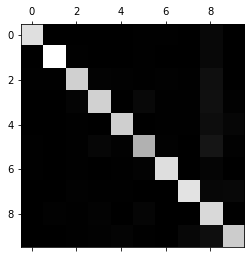

In [ ]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

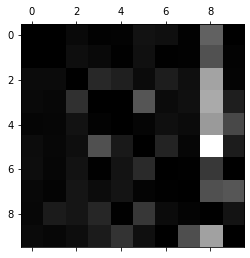

In [ ]:
#We see that the 5's diagonal value is the darkest
  #this might mean that there are fewer images of 5s in our dataset, or that classifier performs poorly on 5s

  #we want to compare error rates!!! NOT absolute number of errors

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0) #by filling with zeros, we only keep the errors basically
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [ ]:
# The column for value 8 is quite bright, meaning that a lot of the images are getting classified as 8s that aren't
# But the row is dark, meaning we actual 8s get correctly predicted as 8s.
  #So it has high recall, but low precision


#So we improve this by helping the 8s. Maybe get more data
  #Or we build a parameter that counts the number of closed loops (2 for an 8)
  #Preprocess images for patterns to stand out more, like a closed loop
    #using scikit-image, pillow or openCV

In [ ]:
cl_a, cl_b = 3,5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)] #where predictions are 3 for real 3s
#and do this for all the matches of a and b

#then plot them all and we can see some of the errors. 
#Maybe we need to preprocess for rotating ones if that is a common thing.

## Multilabel Classification

In [ ]:
# multiple output models (tags)

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd] #concatenate arrays 

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel) #two target labels for each digit, true and false

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])
# 5 is not too large and it is odd!!

array([[False,  True]])

### Scoring for multilabel classifications

One way is to measure F_1 score for each individual label and compute average score

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro")
#assuming all labels are equally important

#we might give it a weight based on its support (the # of instances for that target label) 
  #To do this, set average="weighted"

  

NameError: ignored

## Multioutput Classification

In [ ]:
#An example would be removing noise from an image

#multilabel - one label per pixel
#multioutput - multiple values (0 to 255) for each label



In [ ]:
#Let's add noise to mnist images

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise #directly add to each value noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
#so our inputs are noisy images, and our target is the original clean ones

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

clean_digit = clean_digit.reshape(28,28)

plt.imshow(clean_digit, cmap = 'binary')

NameError: ignored